In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
!wget https://www.craftasmic.co.uk/images/products/standard/19812_55095.jpg -O "a4.jpg"

In [ ]:
def preprocessing(img_path):
  img=cv2.imread(img_path)
  gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  blur_img=cv2.GaussianBlur(gray_img,(7,7),1)
  canny_img=cv2.Canny(blur_img,31,31)
  kernel=np.ones((5,5))
  dilate_img=cv2.dilate(canny_img,kernel,iterations=2)
  erode_img=cv2.erode(dilate_img,kernel,iterations=1)
  return erode_img,img

In [ ]:
def get_contours(img_path,area_thersold=1500,filter=4,draw=False):
  canny_img,img=preprocessing(img_path)
  contours,hig=cv2.findContours(canny_img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
  final_dict={}
  for cnt in contours:
    area=cv2.contourArea(cnt)
    if area>=area_thersold:
      peri=cv2.arcLength(cnt,True)
      approx=cv2.approxPolyDP(cnt,0.02*peri,True)
      objCor=len(approx)
      if filter==objCor:
        bb=cv2.boundingRect(approx)
        final_dict.update({area:{"bboxes":bb,"no_of_corners":objCor,"approx":approx}})
        # cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
  if draw:
    sorted_dict={ i:final_dict[i]  for i in sorted(list(final_dict.keys()),reverse=True)}
    x,y,w,h=sorted_dict[list(sorted_dict.keys())[0]]["bboxes"]
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
  return img , final_dict

In [ ]:
def reorder(dic):
  dic=dic[list(dic.keys())[0]]
  old_shape,new_shape=dic["approx"].shape,(4,2)
  ther=20
  order_points=[]
  reshape_arr=np.reshape(dic["approx"],new_shape)
  for i,j in list(combinations(reshape_arr,2)):
    if abs(i[0]-j[0])<ther:
      order_points.append([list(i),list(j)]) if i[1]<j[1] else order_points.append([list(j),list(i)])
  return np.reshape(np.array(order_points),new_shape)

In [ ]:
img,d=get_contours("a4.jpg")
p1,_,_,p4=reorder(d)

In [ ]:
out=cv2.rectangle(img,p1,p4,(255,0,0),2)

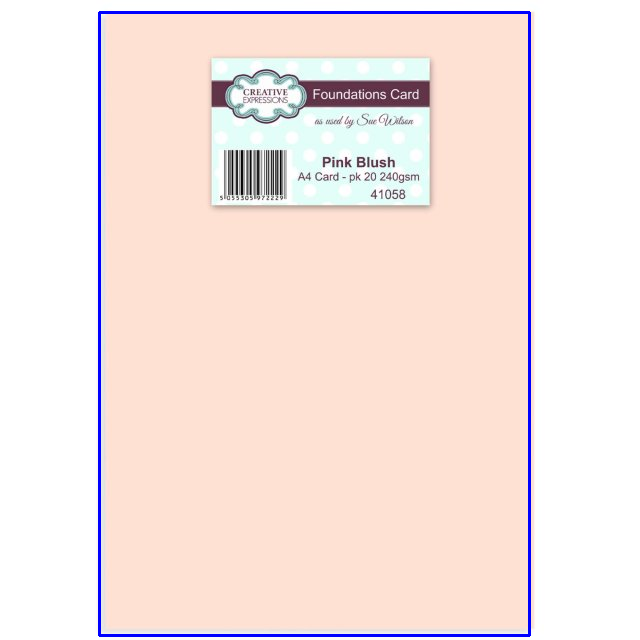

In [ ]:
cv2_imshow(out)

In [ ]:
def wrapImage(img,dic,w,h,pad=20):
  key=list(dic.keys())[0]
  pts1=np.float32(reorder(dic[key]))
  pts2=np.array([[0,0],[w,0],[0,h],[w,h]],dtype=np.float32)
  matrix=cv2.getPerspectiveTransform(pts1,pts2)
  imgwrap=cv2.warpPerspective(img,matrix,(w,h))
  return imgwrap[pad:imgwrap.shape[0]-pad,pad:imgwrap.shape[1]-pad]

In [ ]:
def findDist(pt1,pt2):
  return ((pt2[0]-pt1[0])**2+(pt2[1]-pt1[1])**2)**0.5

In [ ]:
img,d=get_contours("a4.jpg")
scale=3
w,h=210*scale,297*scale
warp_img=wrapImage(img,d,w,h)

In [ ]:
cv2.imwrite("warp_img.jpg",warp_img)

True

In [ ]:
img_1,cnt=get_contours("warp_img.jpg",500)

{70646.0: {'bboxes': (24, 203, 156, 463),
  'no_of_corners': 4,
  'approx': array([[[ 29, 203]],
  
         [[ 24, 661]],
  
         [[178, 665]],
  
         [[179, 208]]], dtype=int32)}}

In [ ]:
p1,p2,p3,p4=reorder(cnt)
i=cv2.rectangle(img_1,p1,p4,(2555,0,0),3)

In [ ]:
p1

array([ 29, 203], dtype=int32)

In [ ]:
points=reorder(cnt)
h=round(findDist(points[0]//scale,points[2]//scale)/10)
w=round(findDist(points[0]//scale,points[1]//scale)/10)

In [ ]:
h,w

(5, 15)

In [ ]:
# warp_img=wrapImage(img,d,w,h)
cv2_imshow(i)

In [ ]:
cnt

{70646.0: {'bboxes': (24, 203, 156, 463),
  'no_of_corners': 4,
  'approx': array([[[ 29, 203]],
  
         [[ 24, 661]],
  
         [[178, 665]],
  
         [[179, 208]]], dtype=int32)}}

In [ ]:
p1,p2,p3,p4

(array([ 29, 203], dtype=int32),
 array([ 24, 661], dtype=int32),
 array([179, 208], dtype=int32),
 array([178, 665], dtype=int32))

In [ ]:
w_pix=(p2-p1)[1]

458

In [ ]:
456*0.0026458333

1.2064999848